In [1]:
#IMPORTS 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import nltk 
from nltk import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns
import string 
import re

## BIDEN 

In [2]:
#reading biden csv 
df_biden = pd.read_csv('hashtag_joebiden.csv')
df_biden.head(5000)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,3,6,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,10/15/20 00:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860,"Philadelphia, PA / Miami, FL",25.7743,-80.1937,NaN,United States of America,North America,Florida,FL,10/21/20 00:00
1,10/15/20 00:00,1.32E+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Twitter for iPad,809904438,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5
2,10/15/20 00:00,1.32E+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Twitter Web App,3494182277,Flag Waver,Flag_Wavers,NaN,...,1536,Golden Valley Arizona,46.304,-109.171,NaN,United States of America,North America,Montana,MT,00:01.0
3,10/15/20 00:00,1.32E+18,@chrislongview Watching and setting dvr. Let’s...,0,0.0,Twitter for iPhone,8.24E+17,Michelle Ferg,MichelleFerg4,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6
4,10/15/20 00:00,1.32E+18,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,Twitter Web App,1.03E+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390,"California, USA",36.7015,-118.756,NaN,United States of America,North America,California,CA,00:02.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10/15/20 09:05,1.32E+18,@BreitbartNews @realDonaldTrump @CIA @FBI * EX...,0,0.0,Twitter Web App,2165033947,RjSeeker,RjSeeker1,GOD IS LORD! | Private Programmer (AES) | http...,...,217,USA | Netherlands | Spain,40,-4,NaN,Spain,Europe,NaN,NaN,44:08.7
4996,10/15/20 09:05,1.32E+18,Trump 2020 never ever let you down yard sign\n...,0,0.0,Twitter Web App,1.12E+18,Camaelshirt,camaelshirt,Camaelshirt - Catch people's eyes! -USA Brand,...,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44:09.2
4997,10/15/20 09:05,1.32E+18,@faznet #FAZ verharmlost einen polit. Skandal ...,43,11.0,Twitter Web App,104966264,B. Frieling-Bailey,frielingbailey,Dipl.-Psych. Barbara Frieling-Bailey [MSc] 🇩🇪...,...,46948,Worldwide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44:10.2
4998,10/15/20 09:05,1.32E+18,@MaajidNawaz @TuckerCarlson Shady deals are sh...,7,1.0,Twitter for iPhone,1.22E+18,ideologicalgoggles,ideologicalgog1,Liberal nihilist bigot - Church of the Laughin...,...,168,"Manchester, England",53.4795,-2.24511,Manchester,United Kingdom,Europe,England,ENG,44:10.8


In [3]:
#cleaning the dataset to display only the first 5000 rows 
#not sure if we should display the whole dataset, that was taking too long to load 
clean_biden_df = df_biden.head(5000)
clean_biden_df.shape

(5000, 21)

In [4]:
#displaying all the columns
clean_biden_df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [5]:
#deleting columns we don't need for sentiment
columns = ['created_at', 'tweet_id', 'source', 'user_id', 'user_screen_name', 'user_join_date',  'lat', 'long', 
         'city', 'country', 'continent', 'state_code', 'collected_at']

clean_biden_df = pd.DataFrame(clean_biden_df.drop(columns, axis=1, inplace=False))
clean_biden_df

,tweet,likes,retweet_count,user_name,user_description,user_followers_count,user_location,state
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,El Sol Latino News,🌐 Noticias de interés para latinos de la costa...,1860,"Philadelphia, PA / Miami, FL",Florida
1,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Cheri A. 🇺🇸,"Locked and loaded Meemaw. Love God, my family ...",6628,NaN,NaN
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Flag Waver,NaN,1536,Golden Valley Arizona,Montana
3,@chrislongview Watching and setting dvr. Let’s...,0,0.0,Michelle Ferg,NaN,27,NaN,NaN
4,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,the Gold State,A Silicon Valley #independent #News #Media #St...,390,"California, USA",California
...,...,...,...,...,...,...,...,...
4995,@BreitbartNews @realDonaldTrump @CIA @FBI * EX...,0,0.0,RjSeeker,GOD IS LORD! | Private Programmer (AES) | http...,217,USA | Netherlands | Spain,NaN
4996,Trump 2020 never ever let you down yard sign\n...,0,0.0,Camaelshirt,Camaelshirt - Catch people's eyes! -USA Brand,90,NaN,NaN
4997,@faznet #FAZ verharmlost einen polit. Skandal ...,43,11.0,B. Frieling-Bailey,Dipl.-Psych. Barbara Frieling-Bailey [MSc] 🇩🇪...,46948,Worldwide,NaN
4998,@MaajidNawaz @TuckerCarlson Shady deals are sh...,7,1.0,ideologicalgoggles,Liberal nihilist bigot - Church of the Laughin...,168,"Manchester, England",England


In [6]:
x = clean_biden_df[['user_name']]
x

,user_name
0,El Sol Latino News
1,Cheri A. 🇺🇸
2,Flag Waver
3,Michelle Ferg
4,the Gold State
...,...
4995,RjSeeker
4996,Camaelshirt
4997,B. Frieling-Bailey
4998,ideologicalgoggles


In [7]:
tweetStates = clean_biden_df[['state', 'tweet']]
tweetStates.head(5000)

tweetStatesClean = tweetStates.dropna()
tweetStatesClean

,state,tweet
0,Florida,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,Montana,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
4,California,#censorship #HunterBiden #Biden #BidenEmails #...
6,Illinois,"In 2020, #NYPost is being #censorship #CENSORE..."
11,Kentucky,"FBI Allegedly Obtained Hunter Biden Computer, ..."
...,...,...
4984,Utrecht,@JoostNiemoller @googlenews Maar die foto's zi...
4985,California,Hollywood's election divide: who are Donald #T...
4987,North Carolina,@DonaldJTrumpJr @nypost So #DonaldTrump gets i...
4992,England,So the #Biden and the #Ukrainian leaked emails...


In [8]:
#converting the tweets column to a string and displaying the second rpw
clean_biden_df['tweet'] = clean_biden_df['tweet'].astype(str)
clean_biden_df['tweet'][2]

#making the tweets lowercase
clean_biden_df['tweet'] = clean_biden_df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
clean_biden_df['tweet'][2]

'@islandgirlprv @bradbeauregardj @meidastouch this is how #biden made his ! #trumpisnotamerica ! https://t.co/ubqafu86ip'

In [9]:
nltk.download('stopwords')
#deleting words that have no power
stop_words = stopwords.words('english')

clean_biden_df['tweet'] = clean_biden_df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
clean_biden_df['tweet'][2]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tarasawhney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'@islandgirlprv @bradbeauregardj @meidastouch #biden made ! #trumpisnotamerica ! https://t.co/ubqafu86ip'

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#THE GOAL HERE IS TO PLOT THE SENTIMENT SCORE AGAINST NUM RETWEETS FOR EACH PRES 
#SEE THE REGRESSION 
#NEED TO FIGURE OUT A WAY TO PLOT THE REGRESSION
#calculate sentiment score 
#define function which can calculate sentiment score of entire dataset 


    
def senti(x): 
    return TextBlob(x).sentiment.polarity
clean_biden_df['senti_score'] = clean_biden_df['tweet'].apply(senti)
clean_biden_df['senti_score']
clean_biden_df

,tweet,likes,retweet_count,user_name,user_description,user_followers_count,user_location,state,senti_score
0,#elecciones2020 | en #florida: #joebiden dice ...,0,0.0,El Sol Latino News,🌐 Noticias de interés para latinos de la costa...,1860,"Philadelphia, PA / Miami, FL",Florida,0.00
1,#hunterbiden #hunterbidenemails #joebiden #joe...,0,0.0,Cheri A. 🇺🇸,"Locked and loaded Meemaw. Love God, my family ...",6628,NaN,NaN,0.00
2,@islandgirlprv @bradbeauregardj @meidastouch #...,0,0.0,Flag Waver,NaN,1536,Golden Valley Arizona,Montana,0.00
3,@chrislongview watching setting dvr. let’s giv...,0,0.0,Michelle Ferg,NaN,27,NaN,NaN,0.00
4,#censorship #hunterbiden #biden #bidenemails #...,1,0.0,the Gold State,A Silicon Valley #independent #News #Media #St...,390,"California, USA",California,0.00
...,...,...,...,...,...,...,...,...,...
4995,@breitbartnews @realdonaldtrump @cia @fbi * ex...,0,0.0,RjSeeker,GOD IS LORD! | Private Programmer (AES) | http...,217,USA | Netherlands | Spain,NaN,0.00
4996,trump 2020 never ever let yard sign grab it: h...,0,0.0,Camaelshirt,Camaelshirt - Catch people's eyes! -USA Brand,90,NaN,NaN,0.00
4997,@faznet #faz verharmlost einen polit. skandal ...,43,11.0,B. Frieling-Bailey,Dipl.-Psych. Barbara Frieling-Bailey [MSc] 🇩🇪...,46948,Worldwide,NaN,0.00
4998,@maajidnawaz @tuckercarlson shady deals shady ...,7,1.0,ideologicalgoggles,Liberal nihilist bigot - Church of the Laughin...,168,"Manchester, England",England,-0.09


In [11]:
state_senti_biden = clean_biden_df[['state', 'senti_score']]
state_senti_biden = state_senti_biden.dropna()
state_senti_biden = state_senti_biden.groupby('state').mean()
state_senti_biden = state_senti_biden.reset_index()
state_senti_biden

,state,senti_score
0,Alabama,0.194858
1,Alaska,0.169444
2,Alberta,-0.244444
3,Alexandria Governorate,0.020000
4,Andalusia,0.000000
...,...,...
149,West Virginia,0.000000
150,Western Australia,0.025000
151,Wisconsin,0.117195
152,Wyoming,0.000000


In [12]:
state_names = pd.read_csv('csvData.csv')
state_names_list = []

for i in state_names['State']:
      state_names_list.append(i)

state_names_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [13]:
US_state_senti_b = []

for i in range(len(state_senti_biden)):

  #print(state_senti_biden['state'].loc[i])
  if state_senti_biden['state'].loc[i] in state_names_list: 
    US_state_senti_row = dict()
    US_state_senti_row['state'] = state_senti_biden['state'].loc[i]
    US_state_senti_row['senti_score'] = state_senti_biden['senti_score'].loc[i]
    
    US_state_senti_b.append(US_state_senti_row)

US_state_senti_b_df = pd.DataFrame(US_state_senti_b)
US_state_senti_b_df

,state,senti_score
0,Alabama,0.194858
1,Alaska,0.169444
2,Arizona,0.052924
3,Arkansas,0.064394
4,California,0.005586
5,Colorado,-0.003552
6,Connecticut,-0.066234
7,Delaware,-0.312500
8,District of Columbia,0.196310
9,Florida,0.030695


## TRUMP

In [14]:
import io 

df_trump = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')
df_trump.head(5000)
# Dataset is now stored in a Pandas Dataframe

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-10-15 06:23:09,1.316626e+18,#Trump \n \nC'est la guerre civile numérique....,3.0,5.0,Twitter for Android,7.714622e+17,Samsonite07,kleensamsonite,🇮🇱🇺🇸🇨🇿 God Before!! Pro-TRUMP-POUTINE-Bolsanar...,...,3847.0,Costa Rica,10.273563,-84.073910,NaN,Costa Rica,North America,NaN,NaN,2020-10-21 00:31:29.968509855
4996,2020-10-15 06:23:33,1.316626e+18,#Trump #VoteBlueDownBallot https://t.co/bydFHw...,1.0,0.0,Twitter for iPhone,1.581236e+08,Countess FrightBat ~ в тихом омуте черти водятся,CorruptNSW,#OLSC & #ASIC ignore #auslaw in husband's esta...,...,5299.0,"Hell,Hades,Mictlan,Tartarus",16.920833,-96.361667,NaN,Mexico,North America,Oaxaca,OAX,2020-10-21 00:31:30.341726385
4997,2020-10-15 06:24:10,1.316626e+18,#uspoli\n#USPolitics\n#Trump\n#Election2020\n\...,0.0,0.0,Twitter for Android,9.733067e+17,Bill Cutler,billcutler27,I measure my life in half-centuries. Would lik...,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:31:30.714942916
4998,2020-10-15 06:24:11,1.316626e+18,The #unmasking of Michael Flynn that #trump pr...,1.0,0.0,Twitter for iPhone,5.160814e+08,Lon from Jets Zone Radio,lonjets,All messy opinions are my own. #GoJets #GoBolt...,...,1044.0,"Palm Beach County, FL USA",26.627980,-80.449417,NaN,United States of America,North America,Florida,FL,2020-10-21 00:31:31.088159446


In [15]:
#cleaning the dataset to display only the first 5000 rows 
#not sure if we should display the whole dataset, that was taking too long to load 
clean_trump_df = df_trump.head(5000)
clean_trump_df.shape

(5000, 21)

In [16]:
username_trump = clean_trump_df[['user_name']]
username_trump

,user_name
0,El Sol Latino News
1,Tgcom24
2,snarke
3,Trumpytweeter
4,Rana Abtar - رنا أبتر
...,...
4995,Samsonite07
4996,Countess FrightBat ~ в тихом омуте черти водятся
4997,Bill Cutler
4998,Lon from Jets Zone Radio


In [17]:
#displaying all the columns
clean_trump_df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [18]:
tweetStates_trump = clean_trump_df[['state', 'tweet']]
tweetStates_trump.head(5000)

tweetStatesClean_t = tweetStates_trump.dropna()
tweetStatesClean_t

,state,tweet
0,Florida,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,Oregon,"#Trump: As a student I used to hear for years,..."
4,District of Columbia,You get a tie! And you get a tie! #Trump ‘s ra...
5,California,@CLady62 Her 15 minutes were over long time ag...
7,Ohio,@DeeviousDenise @realDonaldTrump @nypost There...
...,...,...
4975,England,@tribelaw #AmyConeyBarrett doesn’t seem up to ...
4979,Oklahoma,#CWBA #IceCube #Trump
4992,Ile-de-France,4) Et 1 remarque de bon sens: plus le vote ant...
4996,Oaxaca,#Trump #VoteBlueDownBallot https://t.co/bydFHw...


In [19]:
#deleting columns we don't need for sentiment
columns = ['created_at', 'tweet_id', 'source', 'user_id', 'user_screen_name', 'user_join_date',  'lat', 'long', 
         'city', 'country', 'continent', 'state_code', 'collected_at']

clean_trump_df = pd.DataFrame(clean_trump_df.drop(columns, axis=1, inplace=False))
clean_trump_df

,tweet,likes,retweet_count,user_name,user_description,user_followers_count,user_location,state
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,El Sol Latino News,🌐 Noticias de interés para latinos de la costa...,1860.0,"Philadelphia, PA / Miami, FL",Florida
1,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Tgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,1067661.0,NaN,NaN
2,"#Trump: As a student I used to hear for years,...",2.0,1.0,snarke,"Will mock for food! Freelance writer, blogger,...",1185.0,Portland,Oregon
3,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,"If he doesn't tweet for some time, should we b...",32.0,NaN,NaN
4,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Rana Abtar - رنا أبتر,"Washington Correspondent, Lebanese-American ,c...",5393.0,Washington DC,District of Columbia
...,...,...,...,...,...,...,...,...
4995,#Trump \n \nC'est la guerre civile numérique....,3.0,5.0,Samsonite07,🇮🇱🇺🇸🇨🇿 God Before!! Pro-TRUMP-POUTINE-Bolsanar...,3847.0,Costa Rica,NaN
4996,#Trump #VoteBlueDownBallot https://t.co/bydFHw...,1.0,0.0,Countess FrightBat ~ в тихом омуте черти водятся,#OLSC & #ASIC ignore #auslaw in husband's esta...,5299.0,"Hell,Hades,Mictlan,Tartarus",Oaxaca
4997,#uspoli\n#USPolitics\n#Trump\n#Election2020\n\...,0.0,0.0,Bill Cutler,I measure my life in half-centuries. Would lik...,83.0,NaN,NaN
4998,The #unmasking of Michael Flynn that #trump pr...,1.0,0.0,Lon from Jets Zone Radio,All messy opinions are my own. #GoJets #GoBolt...,1044.0,"Palm Beach County, FL USA",Florida


In [20]:
#converting the tweets column to a string and displaying the second rpw
clean_trump_df['tweet'] = clean_trump_df['tweet'].astype(str)
clean_trump_df['tweet'][2]

#making the tweets lowercase
clean_trump_df['tweet'] = clean_trump_df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
clean_trump_df['tweet'][2]

"#trump: as a student i used to hear for years, for ten years, i heard china! in 2019! and we have 1.5 and they don't know how many we have and i asked them how many do we have and they said 'sir we don't know.' but we have millions. like 300 million. um. what?"

In [21]:
#deleting words that have no power
stop_words = stopwords.words('english')

clean_trump_df['tweet'] = clean_trump_df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
clean_trump_df['tweet'][2]

"#trump: student used hear years, ten years, heard china! 2019! 1.5 know many asked many said 'sir know.' millions. like 300 million. um. what?"

In [22]:
def sentiment(x): 
    
    x = TextBlob(x).sentiment
    print(x)
    

clean_trump_df['senti_score'] = clean_trump_df['tweet'].apply(sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.3333333333333333)
Sentiment(polarity=0.06666666666666667, subjectivity=0.2222222222222222)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1552083333333333, subjectivity=0.4166666666666667)
Sentiment(polarity=0.625, subjectivity=1.0)
Sentiment(polarity=0.05, subjectivity=0.5333333333333333)
Sentiment(polarity=0.10952380952380952, subjectivity=0.47142857142857136)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.03958333333333334, subjectivity=0.9666666666666667)
Sentiment(polarity=-0.1488095238095238, subjectivity=0.6785714285714286)
Sentiment(polarity=0.5, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.8)
Sentiment(polarity=0.33, subjectivity=0.72)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.40416666666666673, subjectivity=0.6833333333333332)
Sentim

In [23]:
# applies senti score to the trump dataframe
clean_trump_df['senti_score'] = clean_trump_df['tweet'].apply(senti)
clean_trump_df['senti_score']
clean_trump_df

,tweet,likes,retweet_count,user_name,user_description,user_followers_count,user_location,state,senti_score
0,#elecciones2020 | en #florida: #joebiden dice ...,0.0,0.0,El Sol Latino News,🌐 Noticias de interés para latinos de la costa...,1860.0,"Philadelphia, PA / Miami, FL",Florida,0.000000
1,"usa 2020, trump contro facebook e twitter: cop...",26.0,9.0,Tgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,1067661.0,NaN,NaN,0.000000
2,"#trump: student used hear years, ten years, he...",2.0,1.0,snarke,"Will mock for food! Freelance writer, blogger,...",1185.0,Portland,Oregon,0.333333
3,2 hours since last tweet #trump! maybe busy. t...,0.0,0.0,Trumpytweeter,"If he doesn't tweet for some time, should we b...",32.0,NaN,NaN,0.066667
4,get tie! get tie! #trump ‘s rally #iowa https:...,4.0,3.0,Rana Abtar - رنا أبتر,"Washington Correspondent, Lebanese-American ,c...",5393.0,Washington DC,District of Columbia,0.000000
...,...,...,...,...,...,...,...,...,...
4995,"#trump c'est la guerre civile numérique.! ""moi...",3.0,5.0,Samsonite07,🇮🇱🇺🇸🇨🇿 God Before!! Pro-TRUMP-POUTINE-Bolsanar...,3847.0,Costa Rica,NaN,0.500000
4996,#trump #votebluedownballot https://t.co/bydfhw...,1.0,0.0,Countess FrightBat ~ в тихом омуте черти водятся,#OLSC & #ASIC ignore #auslaw in husband's esta...,5299.0,"Hell,Hades,Mictlan,Tartarus",Oaxaca,0.000000
4997,#uspoli #uspolitics #trump #election2020 days ...,0.0,0.0,Bill Cutler,I measure my life in half-centuries. Would lik...,83.0,NaN,NaN,0.150000
4998,#unmasking michael flynn #trump promised horri...,1.0,0.0,Lon from Jets Zone Radio,All messy opinions are my own. #GoJets #GoBolt...,1044.0,"Palm Beach County, FL USA",Florida,-0.750000


In [24]:
state_senti_trump = clean_trump_df[['state', 'senti_score']]
state_senti_trump = state_senti_trump.dropna()
state_senti_trump = state_senti_trump.groupby('state').mean()
state_senti_trump = state_senti_trump.reset_index()
state_senti_trump

,state,senti_score
0,Alabama,0.133565
1,Alaska,0.346875
2,Alberta,0.004762
3,Alexandria Governorate,0.112381
4,Andalusia,0.066667
...,...,...
161,Western Australia,0.040751
162,Western Province,0.227778
163,Wisconsin,-0.065476
164,Wyoming,-0.015000


In [25]:
US_state_senti_t = []

for i in range(len(state_senti_trump)):

  #print(state_senti_biden['state'].loc[i])
  if state_senti_trump['state'].loc[i] in state_names_list: 
    US_state_senti_row = dict()
    US_state_senti_row['state'] = state_senti_trump['state'].loc[i]
    US_state_senti_row['senti_score'] = state_senti_trump['senti_score'].loc[i]
    
    US_state_senti_t.append(US_state_senti_row)

US_state_senti_t_df = pd.DataFrame(US_state_senti_t)
US_state_senti_t_df

,state,senti_score
0,Alabama,0.133565
1,Alaska,0.346875
2,Arizona,0.018519
3,Arkansas,0.200000
4,California,0.007430
5,Colorado,-0.004792
6,Connecticut,-0.066468
7,Delaware,0.378788
8,District of Columbia,0.018318
9,Florida,-0.018980


In [26]:
import requests

def get_url(url):
    """ gets html associated with a url 
    
    Args:
        url (str): url website to look up
        
    Returns:
        html_str (str): html associated with this url
    """
    return requests.get(url).text

In [27]:
vote_count_text = get_url("https://en.wikipedia.org/wiki/2020_United_States_presidential_election")
vote_count_text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>2020 United States presidential election - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c594b20a-79a9-4115-b2d0-d86752f64019","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"2020_United_States_presidential_election","wgTitle":"2020 United States presidential election","wgCurRevisionId":1018553698,"wgRevisionId":1018553698,"wgArticleId":48410011,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata"

In [28]:
from bs4 import BeautifulSoup
import pandas as pd

def clean_vote_count(html_str):
    """ scrapes the vote counts for Biden and Trump from each state
    
    ex:
    https://en.wikipedia.org/wiki/2020_United_States_presidential_election
    
    Args:
        html_str (str): html of pitchfork page
        
    Returns:
        df_pitch (DataFrame): each row is the state.   
        contains columns 'artist', 'track' and 
        'source' (source is always 'pitchfork')    
    """
    # build soup
    soup = BeautifulSoup(html_str)
    # list of states
    election_votes_list = []
    
    # grabs the table of election results
    election_table = soup.find_all('table', class_='wikitable sortable')[1]
    # grabs the body of the table
    election_table_body = election_table.find_all('tbody')[0]
    # tags for both color-coded winners
    both_winners = tuple(('background-color:#FFB6B6', 'background-color:#B0CEFF'))
    # grabs each column of table
    states = election_table_body.find_all('tr', style=both_winners)
    
    # loops through columns
    for state_ in states:
        # initializes dict for each states vote data
        state_vote_dict = dict()
        state_vote_dict['State'] = state_.a.text
        
        # grabs each information for the DataFrame
        state_td = state_.find_all('td')
        state_vote_dict['Biden votes'] = state_td[1].text
        state_vote_dict['Biden %'] = state_td[2].text
        state_vote_dict['Trump votes'] = state_td[4].text
        state_vote_dict['Trump %'] = state_td[5].text
        
        election_votes_list.append(state_vote_dict)
    
    # creates DataFrame from list of dict for each state
    df_election_votes = pd.DataFrame(election_votes_list)
    return df_election_votes
    

In [69]:
df_vote_count_sentiment = clean_vote_count(vote_count_text)

#add state names 
df_vote_count_sentiment['State'] = state_names['State']
#add biden sentiment score per state 
df_vote_count_sentiment['Biden sentiment per State'] = US_state_senti_b_df['senti_score']
#add trump sentiment score per state 
df_vote_count_sentiment['Trump sentiment per State'] = US_state_senti_t_df['senti_score']
#drop NAN columns 
df_vote_count_sentiment = df_vote_count_sentiment.dropna()
df_vote_count_sentiment
#remove % sign from Bidnen % column
df_vote_count_sentiment['Biden %'] = df_vote_count_sentiment['Biden %'].str.strip('%')
df_vote_count_sentiment
#remove % sign from Trump % column
df_vote_count_sentiment['Trump %'] = df_vote_count_sentiment['Trump %'].str.strip('%')
df_vote_count_sentiment

,State,Biden votes,Biden %,Trump votes,Trump %,Biden sentiment per State,Trump sentiment per State
0,Alabama,"849,624",36.57,"1,441,170",62.03,0.194858,0.133565
1,Alaska,"153,778",42.77,"189,951",52.83,0.169444,0.346875
2,Arizona,"1,672,143",49.36,"1,661,686",49.06,0.052924,0.018519
3,Arkansas,"423,932",34.78,"760,647",62.40,0.064394,0.200000
4,California,"11,110,250",63.48,"6,006,429",34.32,0.005586,0.007430
5,Colorado,"1,804,352",55.40,"1,364,607",41.90,-0.003552,-0.004792
6,Connecticut,"1,080,831",59.26,"714,717",39.19,-0.066234,-0.066468
7,Delaware,"296,268",58.74,"200,603",39.77,-0.312500,0.378788
8,District of Columbia,"317,323",92.15,"18,586",5.40,0.196310,0.018318
9,Florida,"5,297,045",47.86,"5,668,731",51.22,0.030695,-0.018980


## Linear Regression 
### Biden 

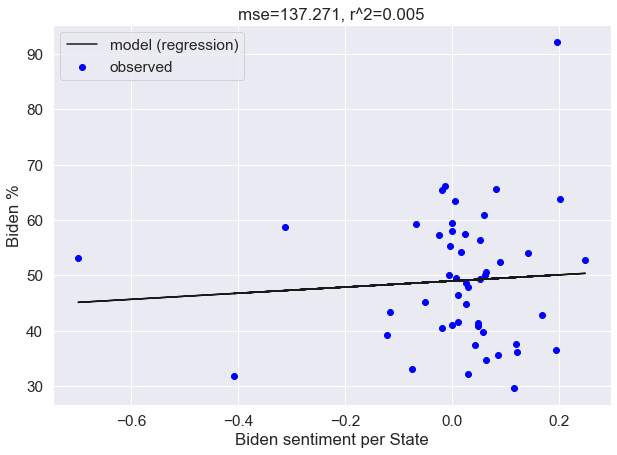

In [68]:
sns.set(font_scale=1.4)

x = np.array(df_vote_count_sentiment['Biden sentiment per State'])
y_true = np.array(df_vote_count_sentiment['Biden %'])

y_true = np.asarray(y_true, dtype = np.float64, 
                        order ='C')
  


# x must be 2 dimensional with shape: (n_samples, n_features)
x = x.reshape(-1, 1)

def plot_regression(x, y_true, color='k'):
    # fit and predict regression model
    reg = LinearRegression()
    reg.fit(x, y_true)
    y_pred = reg.predict(x)
    
    # compute mean squared error
    mse = ((y_pred - y_true) ** 2).mean()
    r2 = r2_score(y_true=y_true, y_pred=y_pred)

    # plot it
    plt.scatter(x, y_true, label='observed', color='Blue')
    plt.xlabel('Biden sentiment per State')
    plt.ylabel('Biden %')
    plt.plot(x, y_pred, label='model (regression)', color=color)
    plt.gca().set_title(f'mse={mse:.3f}, r^2={r2:.3f}')
    plt.legend()
    
plot_regression(x, y_true)
plt.gcf().set_size_inches(10,7)



## Linear Regression 
### Biden Tweet Sentiment vs. Voting Outcome for State Regression

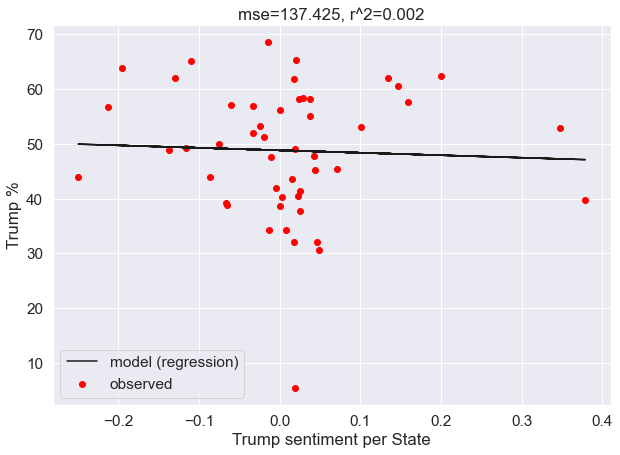

In [54]:
sns.set(font_scale=1.4)

x = np.array(df_vote_count_sentiment['Trump sentiment per State'])
y_true = np.array(df_vote_count_sentiment['Trump %'])

y_true = np.asarray(y_true, dtype = np.float64, 
                        order ='C')
  


# x must be 2 dimensional with shape: (n_samples, n_features)
x = x.reshape(-1, 1)

def plot_regression(x, y_true, color='k'):
    # fit and predict regression model
    reg = LinearRegression()
    reg.fit(x, y_true)
    y_pred = reg.predict(x)
    
    # compute mean squared error
    mse = ((y_pred - y_true) ** 2).mean()
    r2 = r2_score(y_true=y_true, y_pred=y_pred)

    # plot it
    plt.scatter(x, y_true, label='observed', color='Red')
    plt.xlabel('Trump sentiment per State')
    plt.ylabel('Trump %')
    plt.plot(x, y_pred, label='model (regression)', color=color)
    plt.gca().set_title(f'mse={mse:.3f}, r^2={r2:.3f}')
    plt.legend()
    
plot_regression(x, y_true)
plt.gcf().set_size_inches(10, 7)

## K-Means Clustering for Biden

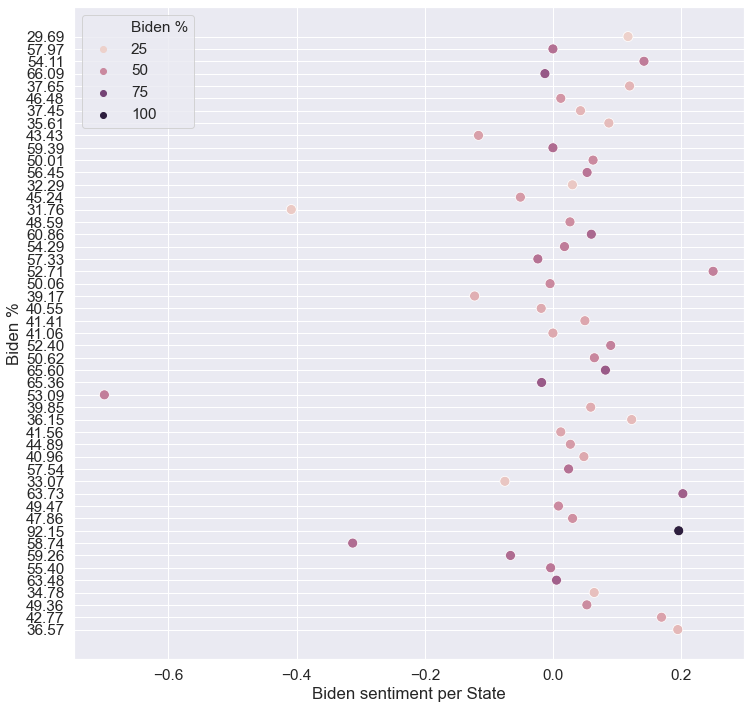

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


df_vote_count_sentiment.dropna(axis=0, how='any', inplace=True)

sns.set(font_scale=1.4)

# 
sns.scatterplot(data=df_vote_count_sentiment, x='Biden sentiment per State', y='Biden %', hue='Biden %', s=100)
plt.gcf().set_size_inches(12,12)

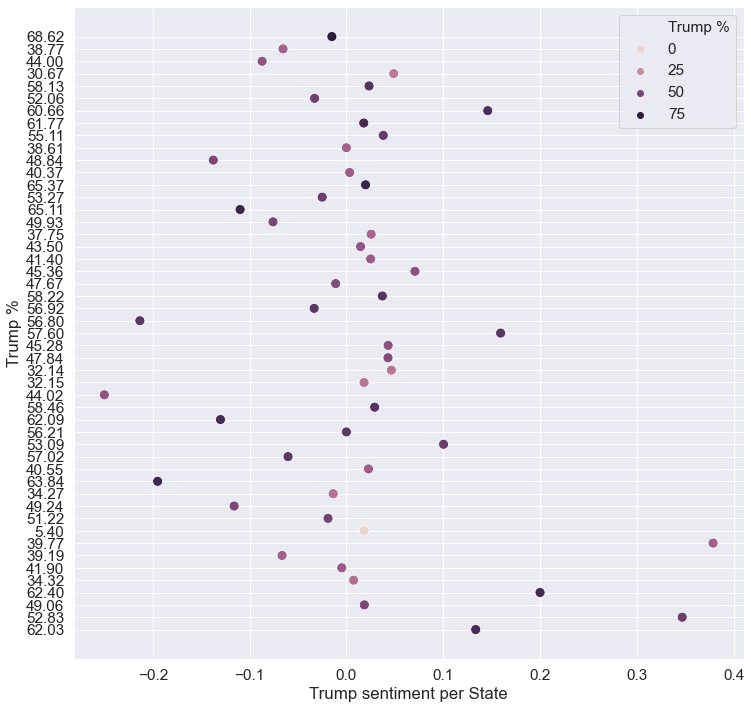

In [57]:

df_vote_count_sentiment.dropna(axis=0, how='any', inplace=True)

sns.set(font_scale=1.4)

# 
sns.scatterplot(data=df_vote_count_sentiment, x='Trump sentiment per State', y='Trump %', hue='Trump %', s=100)
plt.gcf().set_size_inches(12, 12)